In [34]:
from sklearn.datasets import load_breast_cancer 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# learning_rate = 0.1, n_estimators=100, max_depth=3
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format (gbrt.score(X_test, y_test)))

# 과대적합 피하기
# 트리의 최대깊이를 줄여 사전 가지치기
# 학습률 낮추기
cvscores = cross_val_score(gbrt, cancer.data, cancer.target, cv=10)
print("테스트 세트 정확도 CV = 10: {:.3f}\n".format(cvscores.mean())) 
Cvscores = cross_val_score(gbrt, cancer.data, cancer.target, cv=5)
print("테스트 세트 정확도 CV = 5: {: .3f}\n". format(Cvscores.mean()))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965
테스트 세트 정확도 CV = 10: 0.960

테스트 세트 정확도 CV = 5:  0.963



In [35]:
# max_depth=1로 변경 (트리 최대 깊이를 낮춤)
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
# 과적합을 피하고 테스트데이터 성능향상
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format (gbrt.score(X_test, y_test)))
cvscores = cross_val_score(gbrt, cancer.data, cancer.target, cv=10)
print("테스트 세트 정확도 CV = 10: {:.3f}\n".format(cvscores.mean())) 
Cvscores = cross_val_score(gbrt, cancer.data, cancer.target, cv=5)
print("테스트 세트 정확도 CV = 5: {: .3f}\n". format(Cvscores.mean()))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972
테스트 세트 정확도 CV = 10: 0.961

테스트 세트 정확도 CV = 5:  0.965



In [38]:
# learning_rate=0.01로 변경 (학습률을 낮춤)
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format (gbrt.score(X_test, y_test)))
cvscores = cross_val_score(gbrt, cancer.data, cancer.target, cv=10)
print("테스트 세트 정확도 CV = 10: {:.3f}\n".format(cvscores.mean())) 
Cvscores = cross_val_score(gbrt, cancer.data, cancer.target, cv=5)
print("테스트 세트 정확도 CV = 5: {: .3f}\n". format(Cvscores.mean()))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965
테스트 세트 정확도 CV = 10: 0.946

테스트 세트 정확도 CV = 5:  0.944



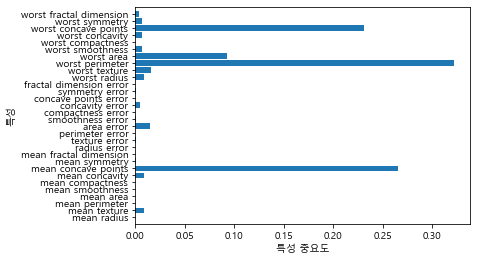

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager,rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
%matplotlib inline

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)